In [22]:
import pandas as pd
import numpy as np
import googlemaps


In [162]:
file_path = '../data/SIHSUS/sihsus_estabelecimento.csv'

df = pd.read_csv(file_path)

In [163]:
df['hospital']   = df['Estabelecimento'].apply(lambda x: x[8:]).str.strip()

In [100]:
hospitais = list(df['hospital'].unique())

### Get Locations

In [102]:
key = open("../../api_key_maps", "r").read()
gmaps = googlemaps.Client(key=key)

In [152]:
def get_locations(hospitais):
    df_hospitais = pd.DataFrame()

    for hospital in hospitais:

        geocode_result = gmaps.geocode("{} ESTADO DE SÃO PAULO".format(hospital))

        df_aux = pd.DataFrame([hospital], columns=['hospital'])

        try:
            address = geocode_result[0]['address_components']

            for i in range(len(address)):
                col = address[i]['types'][0]
                value = address[i]['long_name']
                df_aux[col] = value

            geometry = geocode_result[0]['geometry']

            lat = geometry['location']['lat']
            lng = geometry['location']['lng']
            location_type = geometry['location_type']

            df_aux['lat'] = lat
            df_aux['lng'] = lng
            df_aux['location_type'] = location_type

            df_hospitais = pd.concat([df_hospitais,df_aux],axis=0)
        except:
            df_hospitais = pd.concat([df_hospitais,df_aux],axis=0)
    
    return(df_hospitais)

In [132]:
mask = ((df_hospitais['administrative_area_level_1']!= 'São Paulo') & (df_hospitais['administrative_area_level_1']!= 'State of São Paulo')) | (df_hospitais['administrative_area_level_1'].isnull()) 
        

hospitais_wrong = df_hospitais[mask]
hospitais_rith  = df_hospitais[np.logical_not(mask)]

In [153]:
hospitais = hospitais_wrong['hospital'].tolist()

# hospitais = hospitais[:1]

china constroi  = get_locations(hospitais)

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [155]:
hospitais_final = pd.concat([hospitais_wrong_rigth, hospitais_rith], axis=0)

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [160]:
# hospitais_final.to_csv('../data/Codigos/hospitais_locations.csv', index=False, encoding='utf-8')

In [16]:
df.shape

(106314, 18)

In [17]:
file_path = '../data/SIHSUS/sihsus_municipios.csv'
df2 = pd.read_csv(file_path)

In [18]:
df2.shape

(91227, 18)

In [3]:
file_path = '../data/SIHSUS/sihsus_municipios.csv'

df = pd.read_csv(file_path)

In [11]:
df['Data'] = df['ano'].astype(str) +'-'+ df['mes'].astype(str)
df['Data'] = pd.to_datetime(df['Data'])


In [12]:
city = '354990 São José dos Campos'
mask = df['Município']==city


df_city = df[mask]

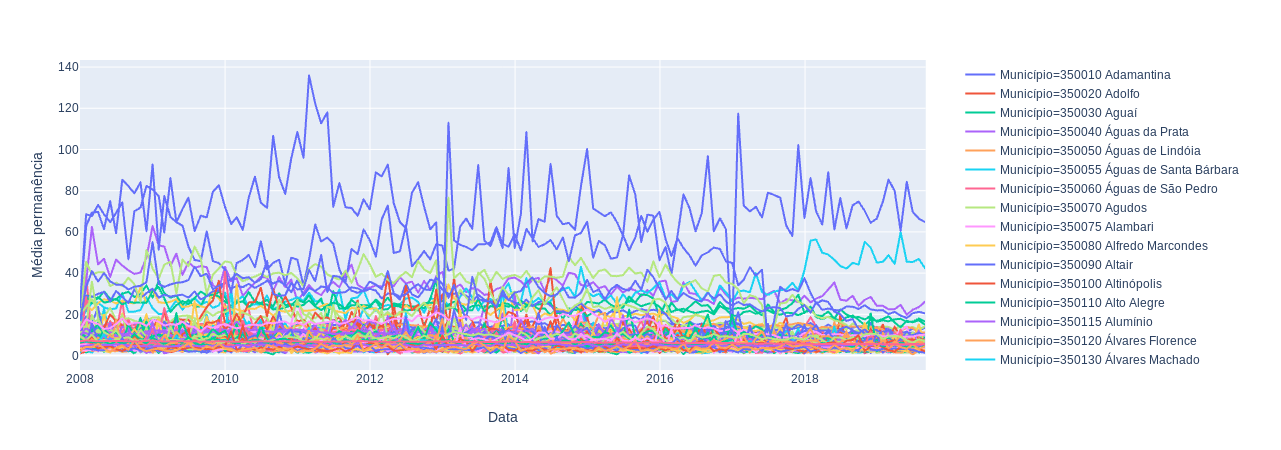

In [13]:
# fig = px.line(df_city, x="Data", y="AIH aprovadas")
fig = px.line(df, x="Data", y="Média permanência", color = 'Município')
# fig = px.line(df_city, x="Data", y="Óbitos")

fig.show()